In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
d_movie=pd.read_csv("/content/Movies.csv",encoding='latin1')
d_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
d_movie.shape

(15509, 10)

In [6]:
d_movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
d_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
d_movie.dropna(subset=['Year'],inplace=True)

In [9]:
d_movie['Duration']=d_movie['Duration'].str.extract(r'([0-9]+)',expand=False)


In [10]:
d_movie.dropna(subset=['Year'],inplace=True)


In [11]:
N_in=pd.read_csv('/content/Movies.csv', encoding='latin-1',names=['id','gender','Age','Profession'])
N_in.head()

,,,,,,id,gender,Age,Profession
Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [12]:
review_movie=pd.read_csv('/content/Movies.csv',encoding='latin-1',names=['id','Movieid','Review','duration'])
review_movie.head()

,,,,,,id,Movieid,Review,duration
Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [13]:
review_movie.shape


(15510, 4)

In [14]:
N_in.shape

(15510, 4)

In [15]:
m_movie=review_movie.merge(N_in,on='id',how='inner')
m_movie.head()

,id,Movieid,Review,duration,gender,Age,Profession
0,Director,Actor 1,Actor 2,Actor 3,Actor 1,Actor 2,Actor 3
1,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Manmauji,Birbal,Rajendra Bhatia
2,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra
3,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,Manmauji,Birbal,Rajendra Bhatia
4,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra


In [16]:
m_movie.isnull().sum()

id            275625
Movieid       284361
Review        290761
duration      296491
gender        284361
Age           290761
Profession    296491
dtype: int64

In [17]:
m_movie['Age'].value_counts()

Age
Rekha                 1349
Hema Malini           1171
Mithun Chakraborty     914
Helen                  891
Dharmendra             883
                      ... 
Neha Sharad              1
Roohi Berde              1
Simran Sharma            1
Renu Maker               1
Sarah Jane Dias          1
Name: count, Length: 4892, dtype: int64

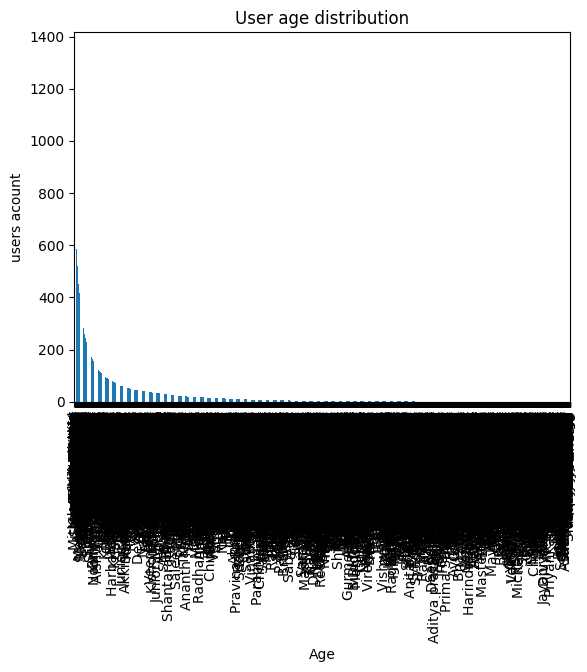

In [23]:
m_movie['Age'].value_counts().plot(kind='bar')
plt.title('User age distribution')
plt.xlabel('Age')
plt.ylabel('users acount')
plt.show()

In [25]:
m_movie.head()

,id,Movieid,Review,duration,gender,Age,Profession
0,Director,Actor 1,Actor 2,Actor 3,Actor 1,Actor 2,Actor 3
1,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Manmauji,Birbal,Rajendra Bhatia
2,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra
3,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,Manmauji,Birbal,Rajendra Bhatia
4,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra


In [26]:
m_movie.to_csv('m_movie.csv', index=False)

In [27]:
d=pd.read_csv('m_movie.csv')
d.head()

<ipython-input-27-420d1bf96e8d>:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv('m_movie.csv')


,id,Movieid,Review,duration,gender,Age,Profession
0,Director,Actor 1,Actor 2,Actor 3,Actor 1,Actor 2,Actor 3
1,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Manmauji,Birbal,Rajendra Bhatia
2,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra
3,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,Manmauji,Birbal,Rajendra Bhatia
4,J.S. Randhawa,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra,J.S. Randhawa,Sonal Mudgal,Sanjay Mishra


In [34]:
X=d.drop(columns=['id','Movieid','duration','gender'],axis=True)


In [35]:
Y=d["Movieid"]

In [36]:
print(X)

                    Review                 Age        Profession
0                  Actor 2             Actor 2           Actor 3
1                   Birbal              Birbal   Rajendra Bhatia
2                   Birbal        Sonal Mudgal     Sanjay Mishra
3             Sonal Mudgal              Birbal   Rajendra Bhatia
4             Sonal Mudgal        Sonal Mudgal     Sanjay Mishra
...                    ...                 ...               ...
422147                 NaN                 NaN               NaN
422148  Mithun Chakraborty  Mithun Chakraborty          Riya Sen
422149     Sarah Jane Dias     Sarah Jane Dias  Raaghavv Chanana
422150           Huma Khan           Huma Khan      Amita Nangia
422151                 NaN                 NaN               NaN

[422152 rows x 3 columns]


In [37]:
print(Y)

0                 Actor 1
1                Manmauji
2                Manmauji
3           J.S. Randhawa
4           J.S. Randhawa
               ...       
422147             Pushpa
422148      Meghan Jadhav
422149      Vicky Kaushal
422150          Akashdeep
422151    Sangeeta Tiwari
Name: Movieid, Length: 422152, dtype: object


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)


In [42]:
print(X.shape,X_train.shape,X_test.shape)


(422152, 3) (337721, 3) (84431, 3)


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [57]:
model=LogisticRegression()